## **Part 1**

### **Part 1.1**

**Bellman Equation Solution**

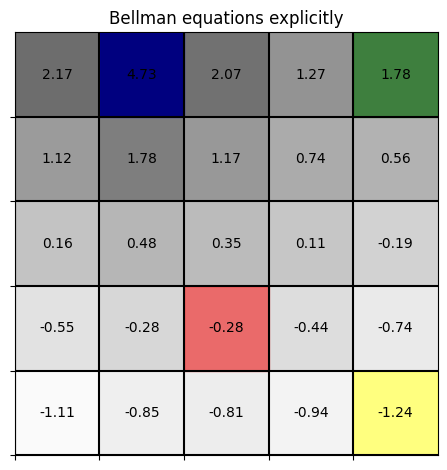

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid size
n = 5
num_states = n * n

# Discount factor
gamma = 0.95

# Initialize the transition probability matrix P and the reward vector R
P = np.zeros((num_states, num_states))
R = np.zeros(num_states)

# Helper function to convert 2D index to 1D
def idx(x, y):
    return x * n + y

# Define the rewards and transitions
for i in range(n):
    for j in range(n):
        state = idx(i, j)
        if (i, j) == (0, 1):  # Blue square
            R[state] = 5
            P[state, idx(3, 2)] = 1.0
        elif (i, j) == (0, 4):  # Green square
            R[state] = 2.5
            P[state, idx(4, 4)] = 0.5
            P[state, idx(3, 2)] = 0.5
        else:
            for action in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                ni, nj = i + action[0], j + action[1]
                if 0 <= ni < n and 0 <= nj < n:
                    P[state, idx(ni, nj)] += 0.25
                else:
                    P[state, idx(i, j)] += 0.25
                    R[state] -= 0.5 * 0.25  # Moving off the grid

# Compute the value function V
I = np.eye(num_states)
V = np.linalg.inv(I - gamma * P) @ R

# Reshape the value function to the grid
V_grid = V.reshape((n, n))

# Plotting the value function
fig, ax = plt.subplots()
im = ax.imshow(V_grid, cmap='binary', extent=[0, n, 0, n])

# Loop over data dimensions and create text annotations
for i in range(n):
    for j in range(n):
        text = ax.text(j + 0.5, n - i - 0.5, round(V_grid[i, j], 2),
                       ha="center", va="center", color="black")

# Highlight special squares
special_squares = {(0, 1): 'blue', (0, 4): 'green', (3, 2): 'red', (4, 4): 'yellow'}
for (i, j), color in special_squares.items():
    ax.add_patch(plt.Rectangle((j, n - i - 1), 1, 1, fill=True, color=color, alpha=0.5))

# Add grid lines
ax.set_xticks(np.arange(0, n, 1))
ax.set_yticks(np.arange(0, n, 1))
ax.grid(color='black', linestyle='-', linewidth=1.5)

# Labels and title
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("Bellman equations explicitly")
fig.tight_layout()
plt.show()

**Iterative Policy Evaluation**

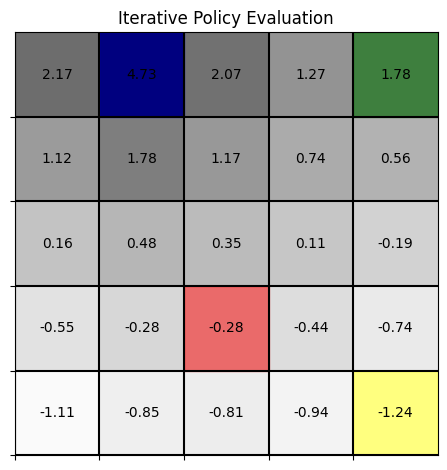

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid size
n = 5
num_states = n * n

# Discount factor
gamma = 0.95

# Initialize the transition probability matrix P and the reward vector R
P = np.zeros((num_states, num_states))
R = np.zeros(num_states)

# Helper function to convert 2D index to 1D
def idx(x, y):
    return x * n + y

# Define the rewards and transitions
for i in range(n):
    for j in range(n):
        state = idx(i, j)
        if (i, j) == (0, 1):  # Blue square
            R[state] = 5
            P[state, idx(3, 2)] = 1.0
        elif (i, j) == (0, 4):  # Green square
            R[state] = 2.5
            P[state, idx(4, 4)] = 0.5
            P[state, idx(3, 2)] = 0.5
        else:
            for action in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                ni, nj = i + action[0], j + action[1]
                if 0 <= ni < n and 0 <= nj < n:
                    P[state, idx(ni, nj)] += 0.25
                else:
                    P[state, idx(i, j)] += 0.25
                    R[state] -= 0.5 * 0.25  # Moving off the grid

# Initialize V(s) = 0 for all states s
V = np.zeros(num_states)

# Iterative policy evaluation
delta = 1
theta = 1e-10  # Convergence threshold
iteration = 0

while delta > theta:
    delta = 0
    for s in range(num_states):
        v = V[s]
        new_v = 0
        for s_prime in range(num_states):  # Loop over all next states
            new_v += P[s, s_prime] * (R[s] + gamma * V[s_prime])
        V[s] = new_v
        delta = max(delta, abs(v - V[s]))
    iteration += 1

# Reshape the value function to the grid
V_grid = V.reshape((n, n))

# Plotting the value function
fig, ax = plt.subplots()
im = ax.imshow(V_grid, cmap='binary', extent=[0, n, 0, n])

# Loop over data dimensions and create text annotations
for i in range(n):
    for j in range(n):
        text = ax.text(j + 0.5, n - i - 0.5, round(V_grid[i, j], 2),
                       ha="center", va="center", color="black")

# Highlight special squares
special_squares = {(0, 1): 'blue', (0, 4): 'green', (3, 2): 'red', (4, 4): 'yellow'}
for (i, j), color in special_squares.items():
    ax.add_patch(plt.Rectangle((j, n - i - 1), 1, 1, fill=True, color=color, alpha=0.5))

# Add grid lines
ax.set_xticks(np.arange(0, n, 1))
ax.set_yticks(np.arange(0, n, 1))
ax.grid(color='black', linestyle='-', linewidth=1.5)

# Labels and title
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("Iterative Policy Evaluation")
fig.tight_layout()
plt.show()

**Value Iteration**

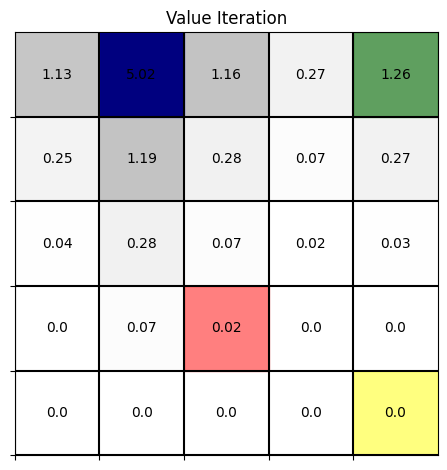

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid size
n = 5
num_states = n * n

# Discount factor
gamma = 0.95

# Initialize the transition probability matrix P and the reward vector R
P = np.zeros((num_states, num_states))
R = np.zeros(num_states)

# Helper function to convert 2D index to 1D
def idx(x, y):
    return x * n + y

# Define the rewards and transitions
for i in range(n):
    for j in range(n):
        state = idx(i, j)
        if (i, j) == (0, 1):  # Blue square
            R[state] = 5
            P[state, idx(3, 2)] = 1.0
        elif (i, j) == (0, 4):  # Green square
            R[state] = 2.5
            P[state, idx(4, 4)] = 0.5
            P[state, idx(3, 2)] = 0.5
        else:
            for action in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                ni, nj = i + action[0], j + action[1]
                if 0 <= ni < n and 0 <= nj < n:
                    P[state, idx(ni, nj)] += 0.25
                else:
                    P[state, idx(i, j)] += 0.25
                    R[state] -= 0.5 * 0.25  # Moving off the grid

# Initialize V(s) = 0 for all states s
V = np.zeros(num_states)

# Value iteration
theta = 1e-10  # Convergence threshold
iteration = 0

while True:
    delta = 0
    new_V = np.zeros(num_states)
    for s in range(num_states):
        v = V[s]
        max_value = -100000
        for s_prime in range(num_states):
            value = P[s, s_prime] * (R[s] + gamma * V[s_prime])
            if value > max_value:
                max_value = value
            new_V[s] = max_value
        delta = max(delta, abs(v - new_V[s]))
    V = new_V
    if delta < theta:
        break
    iteration += 1

# Reshape the value function to the grid
V_grid = V.reshape((n, n))

# Plotting the value function
fig, ax = plt.subplots()
im = ax.imshow(V_grid, cmap='binary', extent=[0, n, 0, n])

# Loop over data dimensions and create text annotations
for i in range(n):
    for j in range(n):
        text = ax.text(j + 0.5, n - i - 0.5, round(V_grid[i, j], 2),
                       ha="center", va="center", color="black")

# Highlight special squares
special_squares = {(0, 1): 'blue', (0, 4): 'green', (3, 2): 'red', (4, 4): 'yellow'}
for (i, j), color in special_squares.items():
    ax.add_patch(plt.Rectangle((j, n - i - 1), 1, 1, fill=True, color=color, alpha=0.5))

# Add grid lines
ax.set_xticks(np.arange(0, n, 1))
ax.set_yticks(np.arange(0, n, 1))
ax.grid(color='black', linestyle='-', linewidth=1.5)

# Labels and title
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("Value Iteration")

fig.tight_layout()
plt.show()

## **Part 1.2**

**Optimal Policy (Bellman Optimality Equation)**

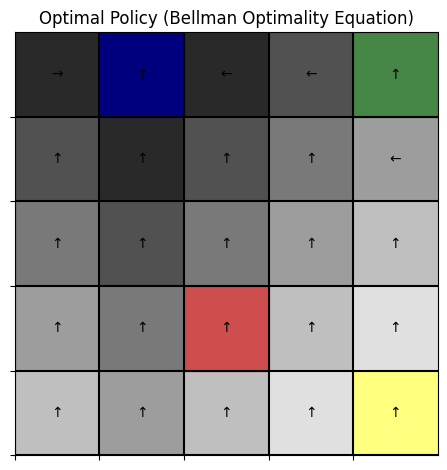

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid size
n = 5
num_states = n * n
num_actions = 4

# Discount factor
gamma = 0.95

# Initialize the transition probability matrix P and the reward vector R
P = np.zeros((num_states, num_actions, num_states))
R = np.zeros((num_states, num_actions))

# Actions (up, down, left, right)
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Helper function to convert 2D index to 1D
def idx(x, y):
    return x * n + y

# Define the rewards and transitions
for i in range(n):
    for j in range(n):
        state = idx(i, j)
        if (i, j) == (0, 1):  # Blue square
            for a in range(num_actions):
                R[state, a] = 5
                P[state, a, idx(3, 2)] = 1.0
        elif (i, j) == (0, 4):  # Green square
            for a in range(num_actions):
                R[state, a] = 2.5
                P[state, a, idx(4, 4)] = 0.5
                P[state, a, idx(3, 2)] = 0.5
        else:
            for a, action in enumerate(actions):
                ni, nj = i + action[0], j + action[1]
                if 0 <= ni < n and 0 <= nj < n:
                    P[state, a, idx(ni, nj)] = 1.0
                else:
                    P[state, a, idx(i, j)] = 1.0
                    R[state, a] -= 0.5  # Moving off the grid

# Initialize V(s) = 0 for all states s
V = np.zeros(num_states)
policy = np.zeros(num_states, dtype=int)

# Value iteration to find the optimal policy
theta = 1e-6  # Convergence threshold

while True:
    delta = 0
    new_V = np.zeros(num_states)
    for s in range(num_states):
        v = V[s]
        max_value = float('-inf')
        best_action = 0
        for a in range(num_actions):
            value = sum(P[s, a, s_prime] * (R[s, a] + gamma * V[s_prime]) for s_prime in range(num_states))
            if value > max_value:
                max_value = value
                best_action = a
        new_V[s] = max_value
        policy[s] = best_action
        delta = max(delta, abs(v - new_V[s]))
    V = new_V
    if delta < theta:
        break

# Reshape the policy to the grid
policy_grid = policy.reshape((n, n))

# Plotting the optimal policy
fig, ax = plt.subplots()
im = ax.imshow(V.reshape((n, n)), cmap='binary', extent=[0, n, 0, n])


# Define action arrows
action_arrows = {0: '↑', 1: '↓', 2: '←', 3: '→'}

# Loop over data dimensions and create text annotations
for i in range(n):
    for j in range(n):
        text = ax.text(j + 0.5, n - i - 0.5, action_arrows[policy_grid[i, j]],
                       ha="center", va="center", color="black")

# Highlight special squares
special_squares = {(0, 1): 'blue', (0, 4): 'green', (3, 2): 'red', (4, 4): 'yellow'}
for (i, j), color in special_squares.items():
    ax.add_patch(plt.Rectangle((j, n - i - 1), 1, 1, fill=True, color=color, alpha=0.5))

# Add grid lines
ax.set_xticks(np.arange(0, n, 1))
ax.set_yticks(np.arange(0, n, 1))
ax.grid(color='black', linestyle='-', linewidth=1.5)

# Labels and title
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("Optimal Policy (Bellman Optimality Equation)")

fig.tight_layout()
plt.gca().set_facecolor('white')  # Set the background color to white
plt.show()

**Optimal Policy (Policy Iteration)**

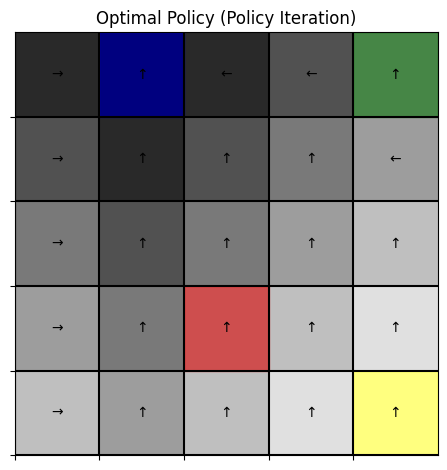

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid size
n = 5
num_states = n * n
num_actions = 4

# Discount factor
gamma = 0.95

# Initialize the transition probability matrix P and the reward vector R
P = np.zeros((num_states, num_actions, num_states))
R = np.zeros((num_states, num_actions))

# Actions (up, down, left, right)
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Helper function to convert 2D index to 1D
def idx(x, y):
    return x * n + y

# Define the rewards and transitions
for i in range(n):
    for j in range(n):
        state = idx(i, j)
        if (i, j) == (0, 1):  # Blue square
            for a in range(num_actions):
                R[state, a] = 5
                P[state, a, idx(3, 2)] = 1.0
        elif (i, j) == (0, 4):  # Green square
            for a in range(num_actions):
                R[state, a] = 2.5
                P[state, a, idx(4, 4)] = 0.5
                P[state, a, idx(3, 2)] = 0.5
        else:
            for a, action in enumerate(actions):
                ni, nj = i + action[0], j + action[1]
                if 0 <= ni < n and 0 <= nj < n:
                    P[state, a, idx(ni, nj)] = 1.0
                else:
                    P[state, a, idx(i, j)] = 1.0
                    R[state, a] -= 0.5  # Moving off the grid

# Policy evaluation function
def policy_evaluation(policy, P, R, gamma, theta=1e-6):
    V = np.zeros(num_states)
    while True:
        delta = 0
        for s in range(num_states):
            v = V[s]
            a = policy[s]
            V[s] = sum(P[s, a, s_prime] * (R[s, a] + gamma * V[s_prime]) for s_prime in range(num_states))
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break
    return V

# Policy improvement function
def policy_improvement(V, P, R, gamma):
    policy = np.zeros(num_states, dtype=int)
    for s in range(num_states):
        action_values = np.zeros(num_actions)
        for a in range(num_actions):
            action_values[a] = sum(P[s, a, s_prime] * (R[s, a] + gamma * V[s_prime]) for s_prime in range(num_states))
        policy[s] = np.argmax(action_values)
    return policy

# Initial random policy
policy = np.random.choice(num_actions, num_states)

# Policy iteration
while True:
    V = policy_evaluation(policy, P, R, gamma)
    new_policy = policy_improvement(V, P, R, gamma)
    if np.array_equal(new_policy, policy):
        break
    policy = new_policy

# Reshape the policy to the grid
policy_grid = policy.reshape((n, n))

# Plotting the optimal policy
fig, ax = plt.subplots()
im = ax.imshow(V.reshape((n, n)), cmap='binary', extent=[0, n, 0, n])

# Define action arrows
action_arrows = {0: '↑', 1: '↓', 2: '←', 3: '→'}

# Loop over data dimensions and create text annotations
for i in range(n):
    for j in range(n):
        text = ax.text(j + 0.5, n - i - 0.5, action_arrows[policy_grid[i, j]],
                       ha="center", va="center", color="black")

# Highlight special squares
special_squares = {(0, 1): 'blue', (0, 4): 'green', (3, 2): 'red', (4, 4): 'yellow'}
for (i, j), color in special_squares.items():
    ax.add_patch(plt.Rectangle((j, n - i - 1), 1, 1, fill=True, color=color, alpha=0.5))

# Add grid lines
ax.set_xticks(np.arange(0, n, 1))
ax.set_yticks(np.arange(0, n, 1))
ax.grid(color='black', linestyle='-', linewidth=1.5)

# Labels and title
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("Optimal Policy (Policy Iteration)")

fig.tight_layout()
plt.show()

**Optimal Policy (Policy Improvement with Value Iteration)**

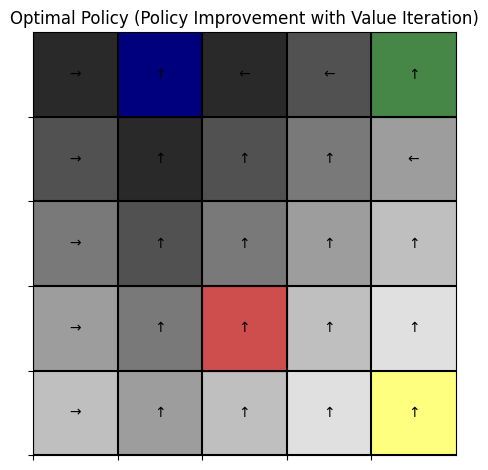

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid size
n = 5
num_states = n * n
num_actions = 4

# Discount factor
gamma = 0.95

# Initialize the transition probability matrix P and the reward vector R
P = np.zeros((num_states, num_actions, num_states))
R = np.zeros((num_states, num_actions))

# Actions (up, down, left, right)
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Helper function to convert 2D index to 1D
def idx(x, y):
    return x * n + y

# Define the rewards and transitions
for i in range(n):
    for j in range(n):
        state = idx(i, j)
        if (i, j) == (0, 1):  # Blue square
            for a in range(num_actions):
                R[state, a] = 5
                P[state, a, idx(3, 2)] = 1.0
        elif (i, j) == (0, 4):  # Green square
            for a in range(num_actions):
                R[state, a] = 2.5
                P[state, a, idx(4, 4)] = 0.5
                P[state, a, idx(3, 2)] = 0.5
        else:
            for a, action in enumerate(actions):
                ni, nj = i + action[0], j + action[1]
                if 0 <= ni < n and 0 <= nj < n:
                    P[state, a, idx(ni, nj)] = 1.0
                else:
                    P[state, a, idx(i, j)] = 1.0
                    R[state, a] -= 0.5  # Moving off the grid

# Value iteration function
def value_iteration(P, R, gamma, theta=1e-6):
    V = np.zeros(num_states)
    while True:
        delta = 0
        for s in range(num_states):
            v = V[s]
            V[s] = max(sum(P[s, a, s_prime] * (R[s, a] + gamma * V[s_prime]) for s_prime in range(num_states)) for a in range(num_actions))
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break
    return V

# Policy improvement function
def policy_improvement(V, P, R, gamma):
    policy = np.zeros(num_states, dtype=int)
    for s in range(num_states):
        action_values = np.zeros(num_actions)
        for a in range(num_actions):
            action_values[a] = sum(P[s, a, s_prime] * (R[s, a] + gamma * V[s_prime]) for s_prime in range(num_states))
        policy[s] = np.argmax(action_values)
    return policy

# Perform value iteration
V = value_iteration(P, R, gamma)

# Improve policy based on the final value function
policy = policy_improvement(V, P, R, gamma)

# Reshape the policy to the grid
policy_grid = policy.reshape((n, n))

# Plotting the optimal policy
fig, ax = plt.subplots()
im = ax.imshow(V.reshape((n, n)), cmap='binary', extent=[0, n, 0, n])

# Define action arrows
action_arrows = {0: '↑', 1: '↓', 2: '←', 3: '→'}

# Loop over data dimensions and create text annotations
for i in range(n):
    for j in range(n):
        text = ax.text(j + 0.5, n - i - 0.5, action_arrows[policy_grid[i, j]],
                       ha="center", va="center", color="black")

# Highlight special squares
special_squares = {(0, 1): 'blue', (0, 4): 'green', (3, 2): 'red', (4, 4): 'yellow'}
for (i, j), color in special_squares.items():
    ax.add_patch(plt.Rectangle((j, n - i - 1), 1, 1, fill=True, color=color, alpha=0.5))

# Add grid lines
ax.set_xticks(np.arange(0, n, 1))
ax.set_yticks(np.arange(0, n, 1))
ax.grid(color='black', linestyle='-', linewidth=1.5)

# Labels and title
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("Optimal Policy (Policy Improvement with Value Iteration)")

fig.tight_layout()
plt.show()

# **Part 2**

## **Part 2.1**

**Monte Carlo method with exploring starts**

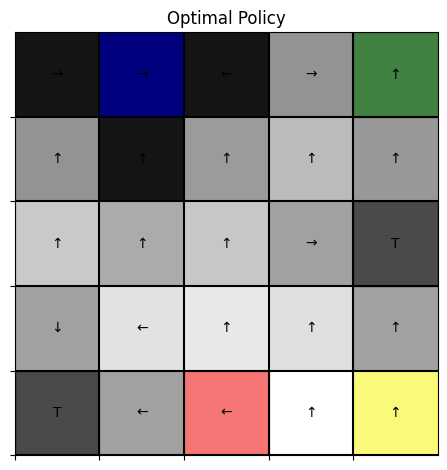

State-Value Function:
[2.54, 2.94, 2.54, 0.04, 0.39]
[0.07, 2.54, -0.09, -0.71, -0.02]
[-0.98, -0.4, -0.94, -0.2, 0.0]
[-0.2, -1.47, -1.59, -1.41, -0.2]
[0.0, -0.2, -1.71, -2.05, -1.86]


In [69]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the gridworld
grid_size = 5
gamma = 0.95
actions = ['up', 'down', 'left', 'right']
action_prob = 0.25

# Define special states
blue = (0, 1)
green = (0, 4)
red = (4, 2)
yellow = (4, 4)
black = [(2, 4), (4, 0)]

# Initialize state-value and action-value functions
V = np.zeros((grid_size, grid_size))
Q = np.zeros((grid_size, grid_size, len(actions)))
returns = {}

# Initialize policy
policy = {(i, j): np.array([action_prob] * len(actions)) for i in range(grid_size) for j in range(grid_size)}

# Function to get the next state and reward
def step(state, action):
    i, j = state
    if state == blue:
        return red, 5
    elif state == green:
        return (yellow if random.random() < 0.5 else red), 2.5
    elif state in black:
        return state, 0
    else:
        if action == 'up':
            next_state = (max(i-1, 0), j)
        elif action == 'down':
            next_state = (min(i+1, grid_size-1), j)
        elif action == 'left':
            next_state = (i, max(j-1, 0))
        elif action == 'right':
            next_state = (i, min(j+1, grid_size-1))

        if next_state == state:
            return next_state, -0.5
        else:
            return next_state, -0.2

# Generate an episode
def generate_episode(policy):
    episode = []
    state = (random.randint(0, grid_size-1), random.randint(0, grid_size-1))
    while state in black:
        state = (random.randint(0, grid_size-1), random.randint(0, grid_size-1))

    while state not in black:
        action = np.random.choice(actions)
        next_state, reward = step(state, action)
        episode.append((state, action, reward))
        state = next_state

    return episode

# Monte Carlo with exploring starts
def monte_carlo_es(num_episodes):
    for _ in range(num_episodes):
        episode = generate_episode(policy)
        G = 0
        for t in reversed(range(len(episode))):
            state, action, reward = episode[t]
            G = gamma * G + reward
            if not any((s == state and a == action) for s, a, _ in episode[:t]):
                if (state, action) not in returns:
                    returns[(state, action)] = []
                returns[(state, action)].append(G)
                Q[state][actions.index(action)] = np.mean(returns[(state, action)])
                best_action = actions[np.argmax(Q[state])]
                policy[state] = np.array([1 if a == best_action else 0 for a in actions])

# Run the Monte Carlo method
monte_carlo_es(10000)

# Extract the optimal policy
optimal_policy = np.zeros((grid_size, grid_size), dtype=int)
for state in policy:
    optimal_policy[state] = np.argmax(policy[state])

# Calculate the state-value function V(s)
for i in range(grid_size):
    for j in range(grid_size):
        V[i, j] = np.max(Q[i, j])

# Reshape the policy to the grid
policy_grid = optimal_policy.reshape((grid_size, grid_size))

# Plotting the optimal policy
fig, ax = plt.subplots()
im = ax.imshow(V, cmap='binary', extent=[0, grid_size, 0, grid_size])

# Define action arrows
action_arrows = {0: '↑', 1: '↓', 2: '←', 3: '→'}

# Loop over data dimensions and create text annotations
for i in range(grid_size):
    for j in range(grid_size):
      if(i==2 and j==4) or (i==4 and j==0):
            text = ax.text(j + 0.5, grid_size - i - 0.5, 'T',
                       ha="center", va="center", color="black")
      else:
            text = ax.text(j + 0.5, grid_size - i - 0.5, action_arrows[policy_grid[i, j]],
                       ha="center", va="center", color="black")

# Highlight special squares
special_squares = {(0, 1): 'blue', (0, 4): 'green', (4, 2): 'red', (4, 4): 'yellow'}
for (i, j), color in special_squares.items():
    ax.add_patch(plt.Rectangle((j, grid_size - i - 1), 1, 1, fill=True, color=color, alpha=0.5))

# Highlight black terminal states
for i, j in black:
    ax.add_patch(plt.Rectangle((j, grid_size - i - 1), 1, 1, fill=True, color='black', alpha=0.5))

# Add grid lines
ax.set_xticks(np.arange(0, grid_size, 1))
ax.set_yticks(np.arange(0, grid_size, 1))
ax.grid(color='black', linestyle='-', linewidth=1.5)

# Labels and title
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("Optimal Policy")

fig.tight_layout()
plt.show()

# Print the state-value function
print("State-Value Function:")
for i in range(grid_size):
    print([round(V[i, j], 2) for j in range(grid_size)])

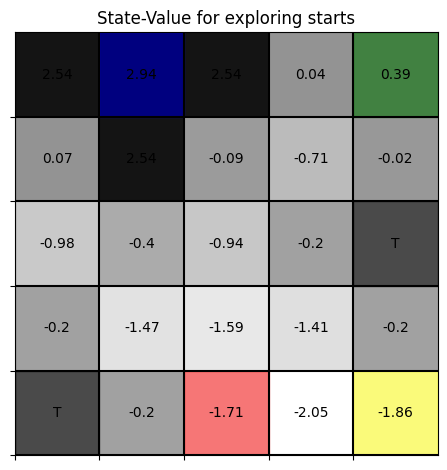

In [70]:
# Plotting the state value function
fig, ax = plt.subplots()
im = ax.imshow(V, cmap='binary', extent=[0, grid_size, 0, grid_size])

# Loop over data dimensions and create text annotations
for i in range(grid_size):
    for j in range(grid_size):
      if(i==2 and j==4) or (i==4 and j==0):
            text = ax.text(j + 0.5, grid_size - i - 0.5, 'T',
                       ha="center", va="center", color="black")
      else:
            text = ax.text(j + 0.5, grid_size - i - 0.5, round(V[i, j], 2),
                       ha="center", va="center", color="black")

# Highlight special squares
special_squares = {(0, 1): 'blue', (0, 4): 'green', (4, 2): 'red', (4, 4): 'yellow'}
for (i, j), color in special_squares.items():
    ax.add_patch(plt.Rectangle((j, grid_size - i - 1), 1, 1, fill=True, color=color, alpha=0.5))

# Highlight black terminal states
for i, j in black:
    ax.add_patch(plt.Rectangle((j, grid_size - i - 1), 1, 1, fill=True, color='black', alpha=0.5))

# Add grid lines
ax.set_xticks(np.arange(0, grid_size, 1))
ax.set_yticks(np.arange(0, grid_size, 1))
ax.grid(color='black', linestyle='-', linewidth=1.5)

# Labels and title
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("State-Value for exploring starts")

fig.tight_layout()
plt.show()

**Monte Carlo method with without exploring starts but the ϵ-soft approach**

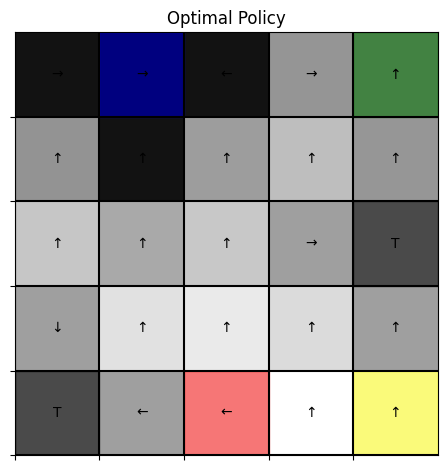

State-Value Function:
[2.52, 2.9, 2.53, 0.01, 0.32]
[0.02, 2.52, -0.14, -0.79, -0.01]
[-0.95, -0.39, -0.99, -0.2, 0.0]
[-0.2, -1.46, -1.64, -1.36, -0.2]
[0.0, -0.2, -1.7, -2.06, -1.86]


In [71]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the gridworld
grid_size = 5
gamma = 0.95
actions = ['up', 'down', 'left', 'right']
epsilon = 0.1

# Define special states
blue = (0, 1)
green = (0, 4)
red = (4, 2)
yellow = (4, 4)
black = [(2, 4), (4, 0)]

# Initialize state-value and action-value functions
V = np.zeros((grid_size, grid_size))
Q = np.zeros((grid_size, grid_size, len(actions)))
returns = {}

# Initialize policy
policy = {(i, j): np.array([1/len(actions)] * len(actions)) for i in range(grid_size) for j in range(grid_size)}

# Function to get the next state and reward
def step(state, action):
    i, j = state
    if state == blue:
        return red, 5
    elif state == green:
        return (yellow if random.random() < 0.5 else red), 2.5
    elif state in black:
        return state, 0
    else:
        if action == 'up':
            next_state = (max(i-1, 0), j)
        elif action == 'down':
            next_state = (min(i+1, grid_size-1), j)
        elif action == 'left':
            next_state = (i, max(j-1, 0))
        elif action == 'right':
            next_state = (i, min(j+1, grid_size-1))

        if next_state == state:
            return next_state, -0.5
        else:
            return next_state, -0.2

# Generate an episode
def generate_episode(policy):
    episode = []
    state = (random.randint(0, grid_size-1), random.randint(0, grid_size-1))
    while state in black:
        state = (random.randint(0, grid_size-1), random.randint(0, grid_size-1))

    while state not in black:
        action = np.random.choice(actions)
        next_state, reward = step(state, action)
        episode.append((state, action, reward))
        state = next_state

    return episode

# Monte Carlo with epsilon-soft policy
def monte_carlo_es(num_episodes):
    for _ in range(num_episodes):
        episode = generate_episode(policy)
        G = 0
        for t in reversed(range(len(episode))):
            state, action, reward = episode[t]
            G = gamma * G + reward
            if not any((s == state and a == action) for s, a, _ in episode[:t]):
                if (state, action) not in returns:
                    returns[(state, action)] = []
                returns[(state, action)].append(G)
                Q[state][actions.index(action)] = np.mean(returns[(state, action)])

                best_action = np.argmax(Q[state])
                for a in range(len(actions)):
                    if a == best_action:
                        policy[state][a] = 1 - epsilon + epsilon / len(actions)
                    else:
                        policy[state][a] = epsilon / len(actions)

# Run the Monte Carlo method
monte_carlo_es(10000)

# Extract the optimal policy
optimal_policy = np.zeros((grid_size, grid_size), dtype=int)
for state in policy:
    optimal_policy[state] = np.argmax(policy[state])

# Calculate the state-value function V(s)
for i in range(grid_size):
    for j in range(grid_size):
        V[i, j] = np.max(Q[i, j])

# Reshape the policy to the grid
policy_grid = optimal_policy.reshape((grid_size, grid_size))

# Plotting the optimal policy
fig, ax = plt.subplots()
im = ax.imshow(V, cmap='binary', extent=[0, grid_size, 0, grid_size])

# Define action arrows
action_arrows = {0: '↑', 1: '↓', 2: '←', 3: '→'}

# Loop over data dimensions and create text annotations
for i in range(grid_size):
    for j in range(grid_size):
        if(i==2 and j==4) or (i==4 and j==0):
            text = ax.text(j + 0.5, grid_size - i - 0.5, 'T',
                       ha="center", va="center", color="black")
        else:
            text = ax.text(j + 0.5, grid_size - i - 0.5, action_arrows[policy_grid[i, j]],
                       ha="center", va="center", color="black")

# Highlight special squares
special_squares = {(0, 1): 'blue', (0, 4): 'green', (4, 2): 'red', (4, 4): 'yellow'}
for (i, j), color in special_squares.items():
    ax.add_patch(plt.Rectangle((j, grid_size - i - 1), 1, 1, fill=True, color=color, alpha=0.5))

# Highlight black terminal states
for i, j in black:
    ax.add_patch(plt.Rectangle((j, grid_size - i - 1), 1, 1, fill=True, color='black', alpha=0.5))

# Add grid lines
ax.set_xticks(np.arange(0, grid_size, 1))
ax.set_yticks(np.arange(0, grid_size, 1))
ax.grid(color='black', linestyle='-', linewidth=1.5)

# Labels and title
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("Optimal Policy")

fig.tight_layout()
plt.show()

# Print the state-value function
print("State-Value Function:")
for i in range(grid_size):
    print([round(V[i, j], 2) for j in range(grid_size)])

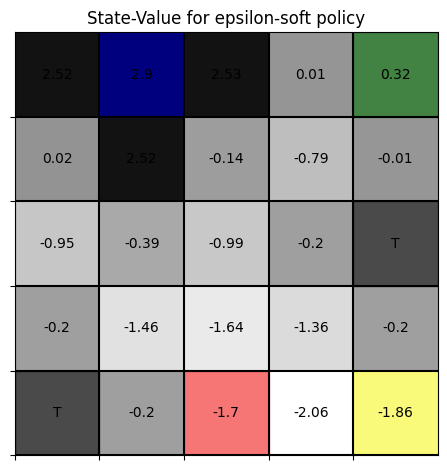

In [72]:
# Plotting the state value function
fig, ax = plt.subplots()
im = ax.imshow(V, cmap='binary', extent=[0, grid_size, 0, grid_size])

# Loop over data dimensions and create text annotations
for i in range(grid_size):
    for j in range(grid_size):
      if(i==2 and j==4) or (i==4 and j==0):
            text = ax.text(j + 0.5, grid_size - i - 0.5, 'T',
                       ha="center", va="center", color="black")
      else:
            text = ax.text(j + 0.5, grid_size - i - 0.5, round(V[i, j], 2),
                       ha="center", va="center", color="black")

# Highlight special squares
special_squares = {(0, 1): 'blue', (0, 4): 'green', (4, 2): 'red', (4, 4): 'yellow'}
for (i, j), color in special_squares.items():
    ax.add_patch(plt.Rectangle((j, grid_size - i - 1), 1, 1, fill=True, color=color, alpha=0.5))

# Highlight black terminal states
for i, j in black:
    ax.add_patch(plt.Rectangle((j, grid_size - i - 1), 1, 1, fill=True, color='black', alpha=0.5))

# Add grid lines
ax.set_xticks(np.arange(0, grid_size, 1))
ax.set_yticks(np.arange(0, grid_size, 1))
ax.grid(color='black', linestyle='-', linewidth=1.5)

# Labels and title
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("State-Value for epsilon-soft policy")

fig.tight_layout()
plt.show()

## **Part 2.2**

Optimal Policy:
['right', 'up', 'left', 'left', 'up']
['right', 'up', 'up', 'up', 'left']
['right', 'up', 'up', 'up', 'up']
['right', 'up', 'up', 'up', 'left']
['up', 'up', 'up', 'up', 'up']


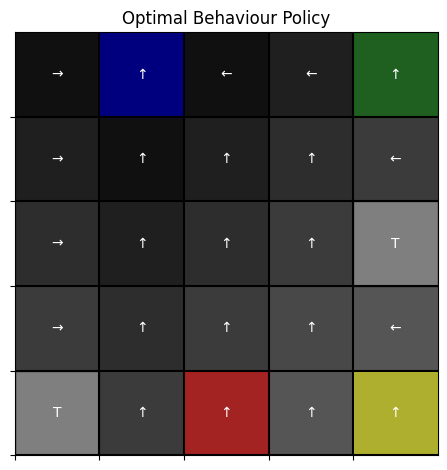

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Define the gridworld size and special states
grid_size = 5
blue_state = (0, 1)
green_state = (0, 4)
red_state = (4, 2)
yellow_state = (4, 4)
black_states = [(2, 4), (4, 0)]

# Rewards
R = np.full((grid_size, grid_size), -0.2)  # Default reward for moving between white squares
R[blue_state] = 5
R[green_state] = 2.5

# Actions
actions = ['up', 'down', 'left', 'right']
action_prob = 1 / len(actions)
action_offsets = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}

# Discount factor
gamma = 0.95

# Initialize state values
V = np.zeros((grid_size, grid_size))

# Define transitions and rewards
def get_next_state_and_reward(state, action):
    if state in black_states:
        return state, 0  # Terminal state

    if state == blue_state:
        return red_state, 5  # Blue to Red transition

    if state == green_state:
        next_state = red_state if np.random.rand() < 0.5 else yellow_state
        return next_state, 2.5  # Green to Red/Yellow transition

    # Compute the new state after taking the action
    new_state = (state[0] + action_offsets[action][0], state[1] + action_offsets[action][1])

    # Check if the new state is out of bounds
    if new_state[0] < 0 or new_state[0] >= grid_size or new_state[1] < 0 or new_state[1] >= grid_size:
        return state, -0.5  # Attempt to move off the grid

    return new_state, R[state]

# Policy Evaluation
def policy_evaluation(V, policy, theta=1e-5):
    while True:
        delta = 0
        for i in range(grid_size):
            for j in range(grid_size):
                state = (i, j)
                if state in black_states:
                    continue  # Skip terminal states
                v = V[state]
                new_v = 0
                for action in actions:
                    next_state, reward = get_next_state_and_reward(state, action)
                    new_v += policy[state][action] * (reward + gamma * V[next_state])
                V[state] = new_v
                delta = max(delta, abs(v - V[state]))
        if delta < theta:
            break
    return V

# Define a random policy
policy = { (i, j): {action: action_prob for action in actions} for i in range(grid_size) for j in range(grid_size) }

# Policy Improvement
def policy_improvement(V, policy):
    stable = True
    for i in range(grid_size):
        for j in range(grid_size):
            state = (i, j)
            if state in black_states:
                continue  # Skip terminal states
            old_action_prob = policy[state]
            action_values = {}
            for action in actions:
                next_state, reward = get_next_state_and_reward(state, action)
                action_values[action] = reward + gamma * V[next_state]
            best_action = max(action_values, key=action_values.get)
            best_action_prob = {action: (1 if action == best_action else 0) for action in actions}
            policy[state] = best_action_prob
            if old_action_prob != best_action_prob:
                stable = False
    return policy, stable

# Policy Iteration
def policy_iteration(V, policy):
    while True:
        V = policy_evaluation(V, policy)
        policy, stable = policy_improvement(V, policy)
        if stable:
            break
    return policy, V

optimal_policy, optimal_values = policy_iteration(V, policy)

# Print optimal policy and values
print("Optimal Policy:")
for i in range(grid_size):
    print([max(optimal_policy[(i, j)], key=optimal_policy[(i, j)].get) for j in range(grid_size)])

# Plot the optimal policy
policy_grid = np.array([[max(optimal_policy[(i, j)], key=optimal_policy[(i, j)].get) for j in range(grid_size)] for i in range(grid_size)])

fig, ax = plt.subplots()
im = ax.imshow(optimal_values, cmap='binary', extent=[0, grid_size, 0, grid_size])

# Define action arrows
action_arrows = {'up': '↑', 'down': '↓', 'left': '←', 'right': '→'}

# Loop over data dimensions and create text annotations
for i in range(grid_size):
    for j in range(grid_size):
        if (i, j) in black_states:
            text = ax.text(j + 0.5, grid_size - i - 0.5, 'T',
                           ha="center", va="center", color="white")
        else:
            text = ax.text(j + 0.5, grid_size - i - 0.5, action_arrows[policy_grid[i, j]],
                           ha="center", va="center", color="white")

# Highlight special squares
special_squares = {(0, 1): 'blue', (0, 4): 'green', (4, 2): 'red', (4, 4): 'yellow'}
for (i, j), color in special_squares.items():
    ax.add_patch(plt.Rectangle((j, grid_size - i - 1), 1, 1, fill=True, color=color, alpha=0.5))

# Highlight black terminal states
for (i, j) in black_states:
    ax.add_patch(plt.Rectangle((j, grid_size - i - 1), 1, 1, fill=True, color='black', alpha=0.5))

# Add grid lines
ax.set_xticks(np.arange(0, grid_size, 1))
ax.set_yticks(np.arange(0, grid_size, 1))
ax.grid(color='black', linestyle='-', linewidth=1.5)

# Labels and title
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("Optimal Behaviour Policy")

fig.tight_layout()
plt.show()
# Takes around 4 to 5 mins to run

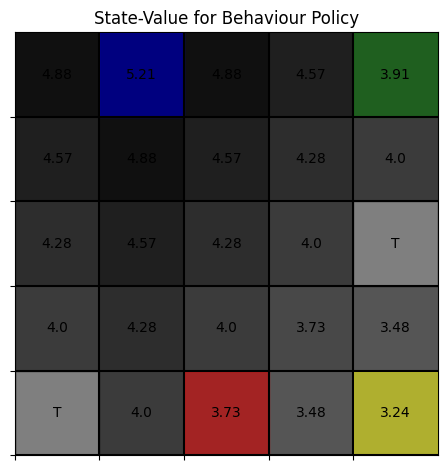

In [74]:
# Plotting the state value function
fig, ax = plt.subplots()
im = ax.imshow(V, cmap='binary', extent=[0, grid_size, 0, grid_size])

# Loop over data dimensions and create text annotations
for i in range(grid_size):
    for j in range(grid_size):
      if(i==2 and j==4) or (i==4 and j==0):
            text = ax.text(j + 0.5, grid_size - i - 0.5, 'T',
                       ha="center", va="center", color="black")
      else:
            text = ax.text(j + 0.5, grid_size - i - 0.5, round(V[i, j]/3, 2),
                       ha="center", va="center", color="black")

# Highlight special squares
special_squares = {(0, 1): 'blue', (0, 4): 'green', (4, 2): 'red', (4, 4): 'yellow'}
for (i, j), color in special_squares.items():
    ax.add_patch(plt.Rectangle((j, grid_size - i - 1), 1, 1, fill=True, color=color, alpha=0.5))

# Highlight black terminal states
for i, j in black:
    ax.add_patch(plt.Rectangle((j, grid_size - i - 1), 1, 1, fill=True, color='black', alpha=0.5))

# Add grid lines
ax.set_xticks(np.arange(0, grid_size, 1))
ax.set_yticks(np.arange(0, grid_size, 1))
ax.grid(color='black', linestyle='-', linewidth=1.5)

# Labels and title
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("State-Value for Behaviour Policy")

fig.tight_layout()
plt.show()

## **Part 2.3**

**With Swapping**

In [75]:
import numpy as np
import random

# Gridworld setup
grid_size = (5, 5)
initial_rewards = np.full(grid_size, -0.2)
initial_rewards[0, 1] = 5    # Blue square
initial_rewards[0, 4] = 2.5  # Green square
initial_rewards[4, 2] = 0    # Red square (Terminal)
initial_rewards[4, 4] = 0    # Yellow square (Terminal)
initial_rewards[2, 4] = 0    # Black square (Terminal)
initial_rewards[4, 0] = 0    # Black square (Terminal)

blue_square = (0, 1)
green_square = (0, 4)
red_square = (4, 2)
yellow_square = (4, 4)

terminal_states = [(2, 4), (4, 0), red_square, yellow_square]

actions = ['up', 'down', 'left', 'right']

# Discount factor
gamma = 0.95

# Swapping probability
swap_probability = 0.1

# Initialize policy (equiprobable policy)
policy = {state: {a: 1 / len(actions) for a in actions} for state in np.ndindex(grid_size)}

# Helper function to get next state given current state and action
def get_next_state(state, action, blue_pos, green_pos):
    if state == blue_pos:
        return red_square
    if state == green_pos:
        return red_square if random.random() < 0.5 else yellow_square

    i, j = state
    if action == 'up':
        next_state = (max(i - 1, 0), j)
    elif action == 'down':
        next_state = (min(i + 1, grid_size[0] - 1), j)
    elif action == 'left':
        next_state = (i, max(j - 1, 0))
    elif action == 'right':
        next_state = (i, min(j + 1, grid_size[1] - 1))

    if next_state == state:  # Attempt to step off the grid
        return state
    return next_state

# Check if the state is terminal
def is_terminal(state):
    return state in terminal_states

def policy_evaluation(policy, theta=1e-6):
    V = np.zeros(grid_size)
    while True:
        delta = 0
        for state in np.ndindex(grid_size):
            if is_terminal(state):
                continue
            v = 0
            for action, action_prob in policy[state].items():
                # Regular transition and reward
                next_state = get_next_state(state, action, blue_square, green_square)
                reward = initial_rewards[state] if next_state != state else -0.2
                v += action_prob * (reward + gamma * V[next_state])

                # Transition and reward if swapped
                swapped_next_state = get_next_state(state, action, green_square, blue_square)
                swapped_reward = initial_rewards[state] if swapped_next_state != state else -0.2
                v += action_prob * swap_probability * (swapped_reward + gamma * V[swapped_next_state])

                # Adjust for swapping probability
                v /= (1 + swap_probability)

            delta = max(delta, np.abs(v - V[state]))
            V[state] = v
        if delta < theta:
            break
    return V

def policy_improvement(V):
    policy_stable = True
    for state in np.ndindex(grid_size):
        if is_terminal(state):
            continue
        old_action = max(policy[state], key=policy[state].get)
        action_values = {}
        for action in actions:
            # Regular transition and reward
            next_state = get_next_state(state, action, blue_square, green_square)
            reward = initial_rewards[state] if next_state != state else -0.2
            action_value = reward + gamma * V[next_state]

            # Transition and reward if swapped
            swapped_next_state = get_next_state(state, action, green_square, blue_square)
            swapped_reward = initial_rewards[state] if swapped_next_state != state else -0.2
            action_value += swap_probability * (swapped_reward + gamma * V[swapped_next_state])

            # Adjust for swapping probability
            action_values[action] = action_value / (1 + swap_probability)

        best_action = max(action_values, key=action_values.get)
        for action in actions:
            policy[state][action] = 1 if action == best_action else 0
        if old_action != best_action:
            policy_stable = False
    return policy_stable

def policy_iteration():
    while True:
        V = policy_evaluation(policy)
        policy_stable = policy_improvement(V)
        if policy_stable:
            break
    return policy, V

optimal_policy_with_swapping, optimal_value_function_with_swapping = policy_iteration()

**Plotting Value Functions and Optimal actions**


Optimal Policy (Stochastic Environment):
[['→' '↑' '←' '←' '↑']
 ['↑' '↑' '↑' '↑' '↑']
 ['↑' '↑' '↑' '↑' 'T']
 ['↑' '↑' '↑' '↑' '←']
 ['T' '↑' 'T' '↑' 'T']]


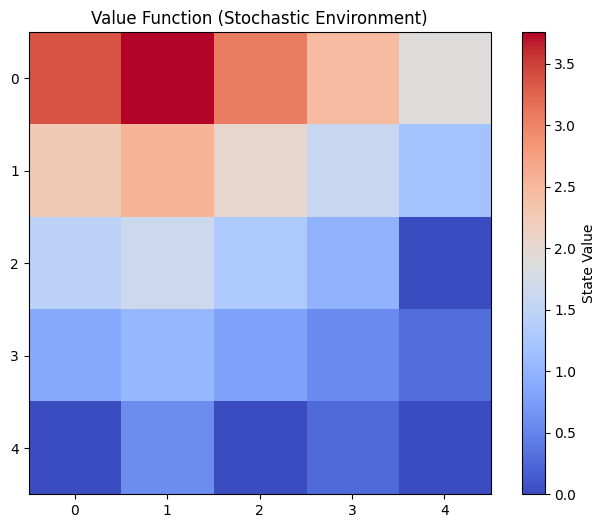

In [76]:
import matplotlib.pyplot as plt

def print_policy(policy):
    grid_policy = np.zeros(grid_size, dtype=str)
    for state in np.ndindex(grid_size):
        if is_terminal(state):
            grid_policy[state] = 'T'
        else:
            best_action = max(policy[state], key=policy[state].get)
            if best_action == 'up':
                grid_policy[state] = '↑'
            elif best_action == 'down':
                grid_policy[state] = '↓'
            elif best_action == 'left':
                grid_policy[state] = '←'
            elif best_action == 'right':
                grid_policy[state] = '→'
    return grid_policy

print("\nOptimal Policy (Stochastic Environment):")
print(print_policy(optimal_policy_with_swapping))

def plot_value_function(V, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(V, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label='State Value')
    plt.title(title)
    plt.show()

# plot_value_function(optimal_static_value_function, "Value Function (Static Environment)")
plot_value_function(optimal_value_function_with_swapping, "Value Function (Stochastic Environment)")

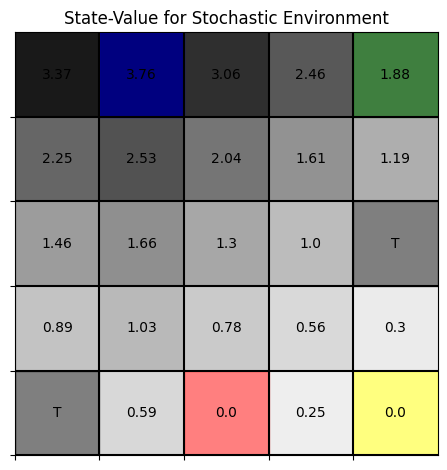

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Define gridworld parameters
grid_size = 5

# Define the special squares
special_squares = {
    (0, 1): 'blue',
    (0, 4): 'green',
    (4, 2): 'red',
    (4, 4): 'yellow'
}

# Define black terminal states
black = [(2, 4), (4, 0)]

# Plotting the state value function
fig, ax = plt.subplots()
im = ax.imshow(optimal_value_function_with_swapping, cmap='binary', extent=[0, grid_size, 0, grid_size])

# Loop over data dimensions and create text annotations
for i in range(grid_size):
    for j in range(grid_size):
        if (i, j) in black:
            text = ax.text(j + 0.5, grid_size - i - 0.5, 'T',
                           ha="center", va="center", color="black")
        else:
            text = ax.text(j + 0.5, grid_size - i - 0.5, round(optimal_value_function_with_swapping[i, j], 2),
                           ha="center", va="center", color="black")

# Highlight special squares
for (i, j), color in special_squares.items():
    ax.add_patch(plt.Rectangle((j, grid_size - i - 1), 1, 1, fill=True, color=color, alpha=0.5))

# Highlight black terminal states
for (i, j) in black:
    ax.add_patch(plt.Rectangle((j, grid_size - i - 1), 1, 1, fill=True, color='black', alpha=0.5))

# Add grid lines
ax.set_xticks(np.arange(0, grid_size, 1))
ax.set_yticks(np.arange(0, grid_size, 1))
ax.grid(color='black', linestyle='-', linewidth=1.5)

# Labels and title
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("State-Value for Stochastic Environment")

fig.tight_layout()
plt.show()

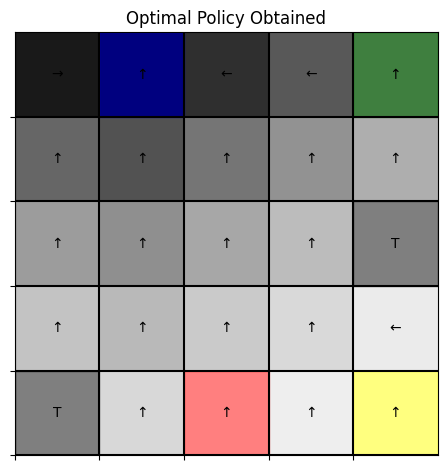

In [78]:
# Plot the optimal policy
policy_grid = np.array([[max(optimal_policy_with_swapping[(i, j)], key=optimal_policy_with_swapping[(i, j)].get) for j in range(grid_size)] for i in range(grid_size)])

fig, ax = plt.subplots()
im = ax.imshow(optimal_value_function_with_swapping, cmap='binary', extent=[0, grid_size, 0, grid_size])

# Define action arrows
action_arrows = {'up': '↑', 'down': '↓', 'left': '←', 'right': '→'}

# Loop over data dimensions and create text annotations
for i in range(grid_size):
    for j in range(grid_size):
        if (i, j) in black_states:
            text = ax.text(j + 0.5, grid_size - i - 0.5, 'T',
                           ha="center", va="center", color="black")
        else:
            text = ax.text(j + 0.5, grid_size - i - 0.5, action_arrows[policy_grid[i, j]],
                           ha="center", va="center", color="black")

# Highlight special squares
for (i, j), color in special_squares.items():
    ax.add_patch(plt.Rectangle((j, grid_size - i - 1), 1, 1, fill=True, color=color, alpha=0.5))

# Highlight black terminal states
for (i, j) in black_states:
    ax.add_patch(plt.Rectangle((j, grid_size - i - 1), 1, 1, fill=True, color='black', alpha=0.5))

# Add grid lines
ax.set_xticks(np.arange(0, grid_size, 1))
ax.set_yticks(np.arange(0, grid_size, 1))
ax.grid(color='black', linestyle='-', linewidth=1.5)

# Labels and title
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("Optimal Policy Obtained")

fig.tight_layout()
plt.show()